In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

TICKER = "AAPL"

# --- Carica dati ---
df = pd.read_csv(
    f"csv/{TICKER}_indicators.csv",
    index_col=0,
    parse_dates=[0],
    date_format="ISO8601"
)

features = [
    "Close", "Volume", "Vol_EMA200", "Return", 
    "EMA50", "EMA200", "RSI", "MACD", "%K", "%D"
]

# --- Features e target ---
X = df[features]
y = df["BSH"]



In [48]:
# Split temporale train/test
cutoff = "2025-01-01"  # adjust so test set is non-empty
X.index = pd.to_datetime(X.index)

cutoff = pd.to_datetime("2024-01-01")
train_mask = X.index < cutoff
test_mask = X.index >= cutoff

X_train = X[train_mask]
X_test = X[test_mask]
y_train = y[train_mask]
y_test = y[test_mask]


bsh_counts = y_test.value_counts()
print(f"  Conteggio etichette per il test di {TICKER}:")
print(bsh_counts)
print(f"  Totale righe: {len(df)}")
print("-" * 40)




  Conteggio etichette per il test di AAPL:
BSH
SELL    259
BUY      92
HOLD     80
Name: count, dtype: int64
  Totale righe: 6269
----------------------------------------


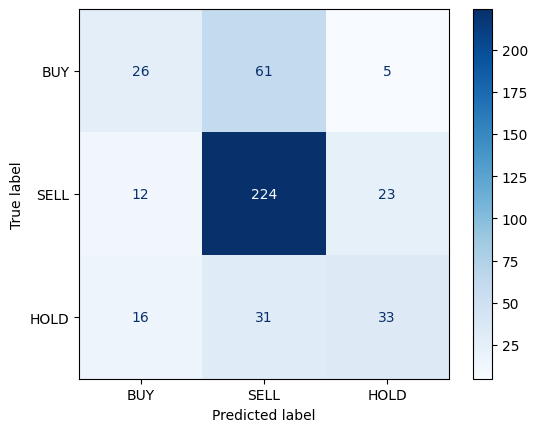

              precision    recall  f1-score   support

         BUY       0.48      0.28      0.36        92
        SELL       0.54      0.41      0.47        80
        HOLD       0.71      0.86      0.78       259

    accuracy                           0.66       431
   macro avg       0.58      0.52      0.53       431
weighted avg       0.63      0.66      0.63       431



In [49]:
# Standardizzazione
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Logistic Regression ---
lr = LogisticRegression(max_iter=1000,solver="lbfgs")
lr.fit(X_train_scaled, y_train)


# Predizioni
y_pred = lr.predict(X_test_scaled)


cm = confusion_matrix(y_test, y_pred, labels=["BUY","SELL","HOLD"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["BUY","SELL","HOLD"])
disp.plot(cmap="Blues")
plt.show()

print(classification_report(y_test, y_pred, target_names=["BUY","SELL","HOLD"]))